<a href="https://colab.research.google.com/github/Islauddin/Emotion_detection/blob/main/Emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Islauddin/Emotion_detection.git

Cloning into 'Emotion_detection'...
remote: Enumerating objects: 34075, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 34075 (delta 0), reused 6 (delta 0), pack-reused 34066
Receiving objects: 100% (34075/34075), 52.76 MiB | 33.89 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (43074/43074), done.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
import keras
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


In [3]:
picture_size = 48

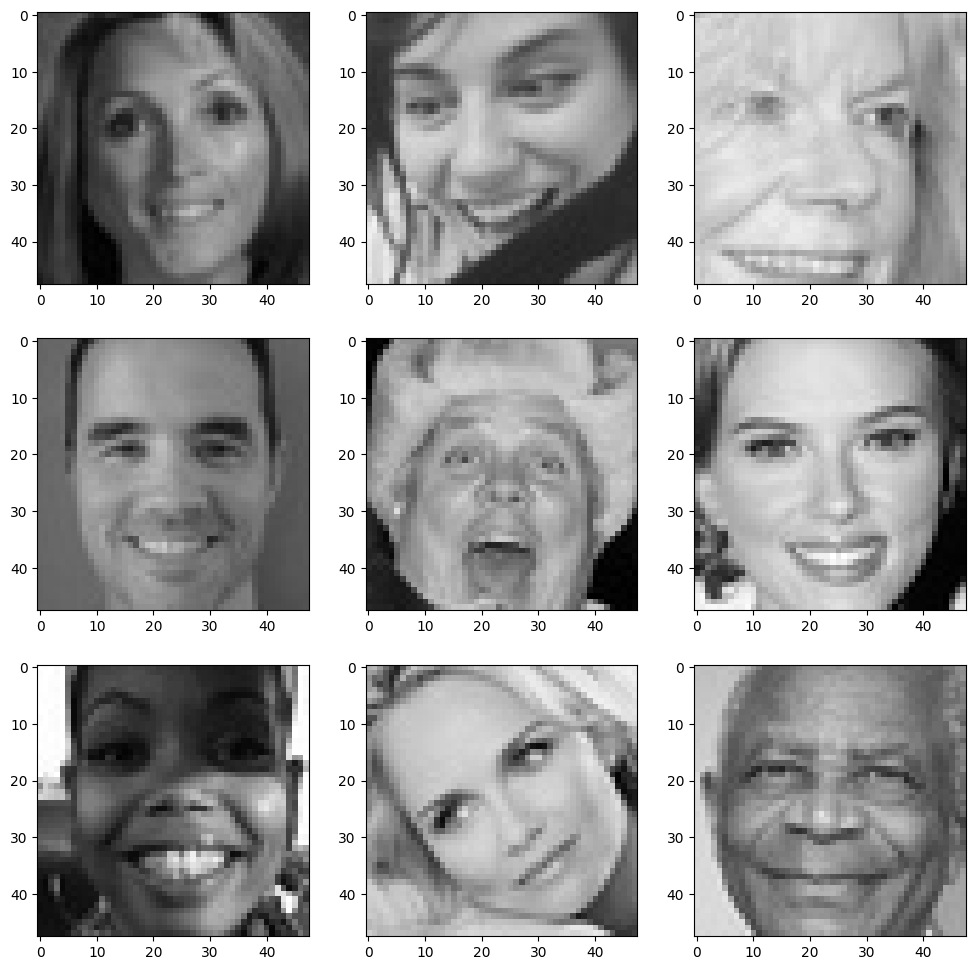

In [4]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("/content/Emotion_detection/train/"+expression+"/"+
                  os.listdir( "/content/Emotion_detection/train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

In [7]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory("/content/Emotion_detection/train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory("/content/Emotion_detection/validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [8]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [11]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]
epochs = 18

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.0001),
              metrics=['accuracy'])

In [12]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list)

Epoch 1/18


<ipython-input-12-9886a6645606>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


225/225 [==============================] - ETA: 0s - loss: 1.7474 - accuracy: 0.3266

225/225 [==============================] - 1663s 7s/step - loss: 1.7474 - accuracy: 0.3266 - val_loss: 1.5494 - val_accuracy: 0.4192 - lr: 0.0010
Epoch 2/18
225/225 [==============================] - ETA: 0s - loss: 1.3917 - accuracy: 0.4662

225/225 [==============================] - 1735s 8s/step - loss: 1.3917 - accuracy: 0.4662 - val_loss: 1.5024 - val_accuracy: 0.4634 - lr: 0.0010
Epoch 3/18
225/225 [==============================] - ETA: 0s - loss: 1.2433 - accuracy: 0.5202

225/225 [==============================] - 1726s 8s/step - loss: 1.2433 - accuracy: 0.5202 - val_loss: 1.4159 - val_accuracy: 0.4587 - lr: 0.0010
Epoch 4/18
225/225 [==============================] - ETA: 0s - loss: 1.1622 - accuracy: 0.5589

225/225 [==============================] - 1665s 7s/step - loss: 1.1622 - accuracy: 0.5589 - val_loss: 1.2118 - val_accuracy: 0.5330 - lr: 0.0010
Epoch 5/18
225/225 [==============================] - ETA: 0s - loss: 1.0995 - accuracy: 0.5834

225/225 [==============================] - 1713s 8s/step - loss: 1.0995 - accuracy: 0.5834 - val_loss: 1.2065 - val_accuracy: 0.5452 - lr: 0.0010
Epoch 6/18
225/225 [==============================] - ETA: 0s - loss: 1.0558 - accuracy: 0.5999

225/225 [==============================] - 1711s 8s/step - loss: 1.0558 - accuracy: 0.5999 - val_loss: 1.1087 - val_accuracy: 0.5841 - lr: 0.0010
Epoch 7/18
225/225 [==============================] - ETA: 0s - loss: 1.0071 - accuracy: 0.6194

225/225 [==============================] - 1708s 8s/step - loss: 1.0071 - accuracy: 0.6194 - val_loss: 1.2628 - val_accuracy: 0.5186 - lr: 0.0010
Epoch 8/18
225/225 [==============================] - ETA: 0s - loss: 0.9713 - accuracy: 0.6328

225/225 [==============================] - 1710s 8s/step - loss: 0.9713 - accuracy: 0.6328 - val_loss: 1.1232 - val_accuracy: 0.5817 - lr: 0.0010
Epoch 9/18
225/225 [==============================] - ETA: 0s - loss: 0.9145 - accuracy: 0.6594Restoring model weights from the end of the best epoch: 6.



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
225/225 [==============================] - 1704s 8s/step - loss: 0.9145 - accuracy: 0.6594 - val_loss: 1.1542 - val_accuracy: 0.5656 - lr: 0.0010
Epoch 9: early stopping


In [13]:
model.save('model.h5')

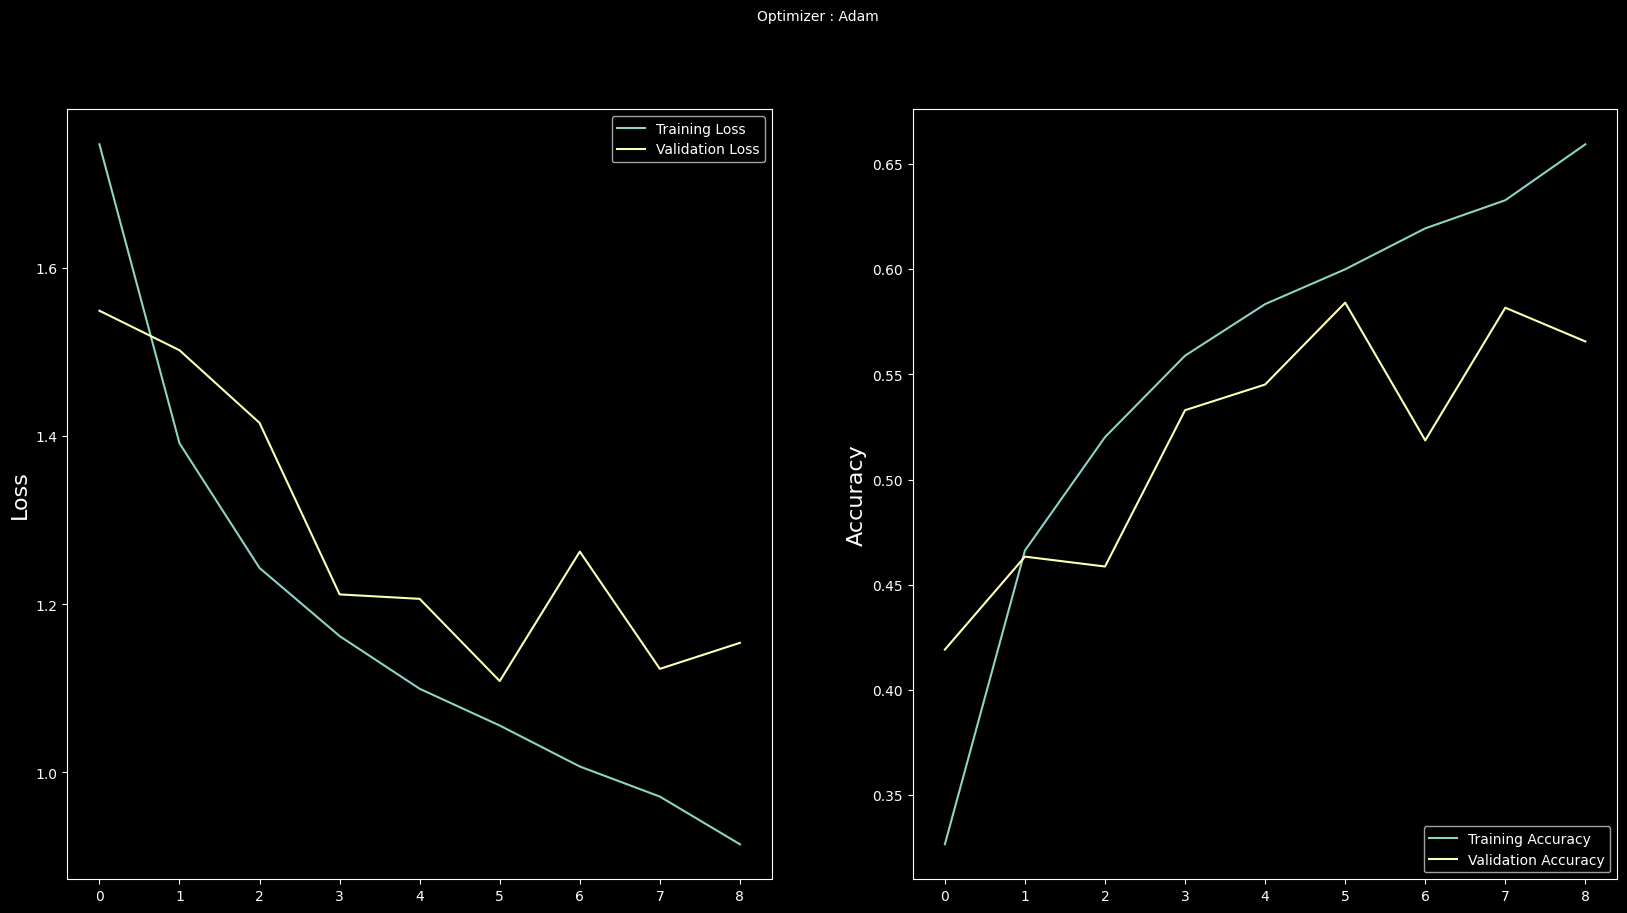

In [14]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()